In [14]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [15]:
mnist_transform=transforms.Compose([
                              transforms.Resize((28,28)),
                              transforms.ToTensor(), # first, convert image to PyTorch (float) tensor
                              transforms.Normalize((0.5,), (0.5,)) # normalize inputs, x' = (x-u)/std, x'=[-1, 1] 
                              ])     

train_dataset = datasets.MNIST(root='./mnist_data', 
                                  train=True, 
                                  download=True, 
                                  transform=mnist_transform)
#print(train_dataset)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True) 
# shuffle training data before each epoch to avoid local min

# contruct model architecture

In [16]:
class NN_MNIST(nn.Module):
  def __init__(self, NN_in, H1, H2, H3, NN_out):
    super().__init__()
    self.linear1 = nn.Linear(NN_in, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, H3)
    self.linear4 = nn.Linear(H3, NN_out)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = F.relu(self.linear3(x))
    x = self.linear4(x) # activation not needed for multi-class classification task
    return x

# make model instance

In [17]:
torch.manual_seed(1)
model = NN_MNIST(784, 128, 64, 32, 10)
model

NN_MNIST(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=32, bias=True)
  (linear4): Linear(in_features=32, out_features=10, bias=True)
)

# optimizer

In [18]:
# optimizer = torch.optim.Adam(model.parameters(), lr=0.05)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
criterion = nn.CrossEntropyLoss() # cf. BCE()

In [19]:
epochs = 10
running_loss_history = []
running_corrects_history = []

for eno in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0

  # a batch of 100 images x 600 batches -> 60,000 for a single epoch 
  for inputs, labels in train_loader:     
    # input [100(batch size), 1(channel), 28(width), 28(height)] =>     
    inputs = inputs.view(inputs.shape[0], -1) # [100, 784]
    outputs = model(inputs) # logits (scores)
    loss = criterion(outputs, labels) # outputs [100, 1], labels [100]
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #max function output(max, max_indices)
    _, pred_idx = torch.max(outputs, 1) # 2nd argument - the dim to reduce    

    running_loss += loss.item() # loss per batch 
    running_corrects += torch.sum(pred_idx == labels.data)
  else:
    epoch_loss = running_loss/len(train_loader) 
    running_loss_history.append(epoch_loss)
    epoch_acc = (running_corrects.float()/inputs.shape[0]*100)/len(train_loader) 
    running_corrects_history.append(epoch_acc)
    print('--------------- epoch: ', (eno+1), '---------------')
    print('training loss: {:.4f}, accuracy {:.4f}'.format(epoch_loss, epoch_acc.item()))

--------------- epoch:  1 ---------------
training loss: 0.8212, accuracy 74.3517
--------------- epoch:  2 ---------------
training loss: 0.2846, accuracy 91.2750
--------------- epoch:  3 ---------------
training loss: 0.2047, accuracy 93.7200
--------------- epoch:  4 ---------------
training loss: 0.1657, accuracy 94.9250
--------------- epoch:  5 ---------------
training loss: 0.1383, accuracy 95.7900
--------------- epoch:  6 ---------------
training loss: 0.1201, accuracy 96.3467
--------------- epoch:  7 ---------------
training loss: 0.1063, accuracy 96.7267
--------------- epoch:  8 ---------------
training loss: 0.0938, accuracy 97.1283
--------------- epoch:  9 ---------------
training loss: 0.0836, accuracy 97.4617
--------------- epoch:  10 ---------------
training loss: 0.0755, accuracy 97.6300


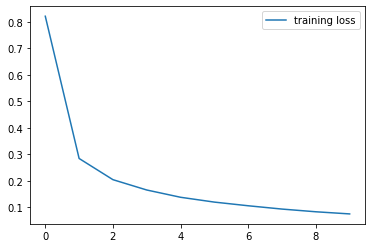

In [20]:
plt.plot(running_loss_history, label='training loss')
plt.legend()

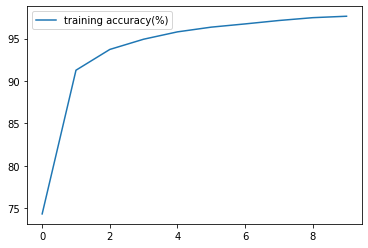

In [21]:
plt.plot(running_corrects_history, label='training accuracy(%)')
plt.legend()